In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
from wm import Image as Image
from wm.moments import RadialHarmonicFourierMoment
from wm.moments import ZernikeMoment
from wm.moments import PseudoZernikeMoment

In [25]:
w = np.random.randint(2, size=64)

## RHFM

In [26]:
%%time
N = 128
order = 50
im = Image('images/monochrome/arctichare_'+str(N)+'.png', colored=False)
RHFM = RadialHarmonicFourierMoment(order, N, Vfile='V_RHFM_'+str(N)+'.h5')

CPU times: user 340 ms, sys: 1.03 s, total: 1.37 s
Wall time: 7.03 s


In [27]:
%%time
E = RHFM.encode(im, w, verbose=True)

CPU times: user 3.6 s, sys: 0 ns, total: 3.6 s
Wall time: 3.49 s


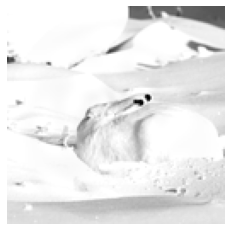

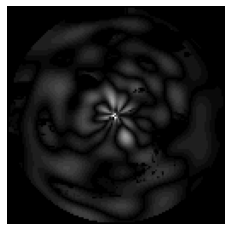

In [28]:
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [29]:
%%time
w2 = RHFM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
[0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
CPU times: user 393 ms, sys: 0 ns, total: 393 ms
Wall time: 375 ms


In [30]:
RHFM.unloadVfile()

## ZM

In [31]:
%%time
N = 128
order = 50
im = Image('images/monochrome/arctichare_'+str(N)+'.png', colored=False)
ZM = ZernikeMoment(order, N, Vfile='V_ZM_'+str(N)+'.h5')

CPU times: user 365 ms, sys: 617 ms, total: 982 ms
Wall time: 7.24 s


In [32]:
%%time
E = ZM.encode(im, w, verbose=True)

CPU times: user 3.27 s, sys: 35.8 ms, total: 3.31 s
Wall time: 3.2 s


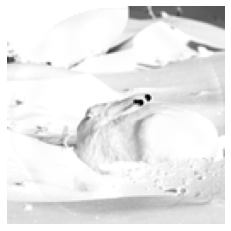

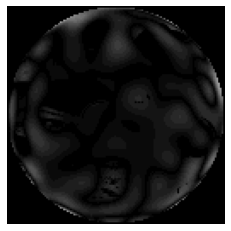

In [33]:
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [34]:
%%time
w2 = ZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
[0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0]
CPU times: user 54.6 ms, sys: 58.9 ms, total: 114 ms
Wall time: 83.6 ms


In [35]:
ZM.unloadVfile()

## PZM

In [36]:
%%time
N = 128
order = 50
im = Image('images/monochrome/arctichare_'+str(N)+'.png', colored=False)
PZM = PseudoZernikeMoment(order, N, Vfile='V_PZM_'+str(N)+'.h5')

CPU times: user 514 ms, sys: 784 ms, total: 1.3 s
Wall time: 7.14 s


In [37]:
%%time
E = PZM.encode(im, w, verbose=True)

CPU times: user 3.55 s, sys: 68.8 ms, total: 3.62 s
Wall time: 3.51 s


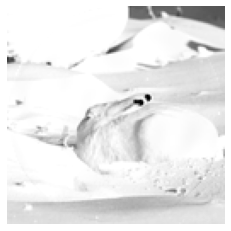

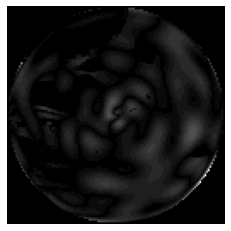

In [38]:
E.show()
imdiff = np.abs(im.im.astype('float16') - E.im.astype('float16')).astype('uint16')
II = Image(10*imdiff, colored=False)
II.show()

In [39]:
%%time
w2 = PZM.decode(E, pos=len(w), verbose=True)
print(w)
print(np.array(w2))

[0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
[0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
CPU times: user 67.9 ms, sys: 11.3 ms, total: 79.2 ms
Wall time: 55.2 ms


In [40]:
PZM.unloadVfile()